# Apparent Temperature

##Problem Statement 
###This project is a programming assignment wherein you have to make an EDA report to analyse the factors affecting the apparent temperature given other weather variables in an hourly manner.

##Objectives:

###You are required to prepare a well-commented an interactive python notebook as your solution to this problem statement. The notebook must meet the following objectives:

###1. Clean the data and drop useless columns.
###2. Make an EDA report, i.e., perform a univariate and bivariate analysis. Also, derive new features based on the given features if necessary.
###3. Visualize the distributions of various features and correlations between them.

In [0]:


# import all packages and set plots to be embedded inline

import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [0]:
# Loadind data

df = pd.read_csv('weather_data.csv')

## Variable Identification


In [3]:
df.shape

(5999, 12)

It looks like, we have 5999 records with 12 columns. lets look some of records of our data.

In [4]:
df.head()

,Formatted Date,Summary,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars),Daily Summary
0,2006-04-01 00:00:00.000 +0200,Partly Cloudy,rain,9.472222,7.388889,0.89,14.1197,251,15.8263,0,1015.13,Partly cloudy throughout the day.
1,2006-04-01 01:00:00.000 +0200,Partly Cloudy,rain,9.355556,7.227778,0.86,14.2646,259,15.8263,0,1015.63,Partly cloudy throughout the day.
2,2006-04-01 02:00:00.000 +0200,Mostly Cloudy,rain,9.377778,9.377778,0.89,3.9284,204,14.9569,0,1015.94,Partly cloudy throughout the day.
3,2006-04-01 03:00:00.000 +0200,Partly Cloudy,rain,8.288889,5.944444,0.83,14.1036,269,15.8263,0,1016.41,Partly cloudy throughout the day.
4,2006-04-01 04:00:00.000 +0200,Mostly Cloudy,rain,8.755556,6.977778,0.83,11.0446,259,15.8263,0,1016.51,Partly cloudy throughout the day.


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5999 entries, 0 to 5998
Data columns (total 12 columns):
Formatted Date              5999 non-null object
Summary                     5999 non-null object
Precip Type                 5999 non-null object
Temperature (C)             5999 non-null float64
Apparent Temperature (C)    5999 non-null float64
Humidity                    5999 non-null float64
Wind Speed (km/h)           5999 non-null float64
Wind Bearing (degrees)      5999 non-null int64
Visibility (km)             5999 non-null float64
Loud Cover                  5999 non-null int64
Pressure (millibars)        5999 non-null float64
Daily Summary               5999 non-null object
dtypes: float64(6), int64(2), object(4)
memory usage: 562.5+ KB


In [6]:
# Categorical Variables

categorial = df.select_dtypes(include=['object']).keys()
print(categorial)

Index(['Formatted Date', 'Summary', 'Precip Type', 'Daily Summary'], dtype='object')


In [7]:
# Quantitative Variables

quatitative = df.select_dtypes(include=['int64','float64']).keys()
print(quatitative)

Index(['Temperature (C)', 'Apparent Temperature (C)', 'Humidity',
       'Wind Speed (km/h)', 'Wind Bearing (degrees)', 'Visibility (km)',
       'Loud Cover', 'Pressure (millibars)'],
      dtype='object')


We have to create more variables for hourly visualization 

In [0]:
# DateTime, Hour Formation

df['Date'] = pd.to_datetime(df['Formatted Date'], utc='true')
df['Hour'] = df['Date'].dt.hour

In [9]:
df.shape

(5999, 14)

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5999 entries, 0 to 5998
Data columns (total 14 columns):
Formatted Date              5999 non-null object
Summary                     5999 non-null object
Precip Type                 5999 non-null object
Temperature (C)             5999 non-null float64
Apparent Temperature (C)    5999 non-null float64
Humidity                    5999 non-null float64
Wind Speed (km/h)           5999 non-null float64
Wind Bearing (degrees)      5999 non-null int64
Visibility (km)             5999 non-null float64
Loud Cover                  5999 non-null int64
Pressure (millibars)        5999 non-null float64
Daily Summary               5999 non-null object
Date                        5999 non-null datetime64[ns, UTC]
Hour                        5999 non-null int64
dtypes: datetime64[ns, UTC](1), float64(6), int64(3), object(4)
memory usage: 656.2+ KB


We have to check for the null values. If null values are present then we have remove it.

In [11]:
df.isna().any()

Formatted Date              False
Summary                     False
Precip Type                 False
Temperature (C)             False
Apparent Temperature (C)    False
Humidity                    False
Wind Speed (km/h)           False
Wind Bearing (degrees)      False
Visibility (km)             False
Loud Cover                  False
Pressure (millibars)        False
Daily Summary               False
Date                        False
Hour                        False
dtype: bool

In [12]:
round(100*(df.isnull().sum()/len(df.index)),2)

Formatted Date              0.0
Summary                     0.0
Precip Type                 0.0
Temperature (C)             0.0
Apparent Temperature (C)    0.0
Humidity                    0.0
Wind Speed (km/h)           0.0
Wind Bearing (degrees)      0.0
Visibility (km)             0.0
Loud Cover                  0.0
Pressure (millibars)        0.0
Daily Summary               0.0
Date                        0.0
Hour                        0.0
dtype: float64

There is no any null values. We will proceed further exploration.




## Data Exploration


## 1. Univariate Analysis


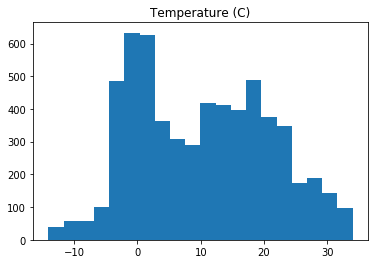

In [13]:
plt.title('Temperature (C)')
plt.hist(x = 'Temperature (C)', bins =20, data = df)
plt.show()

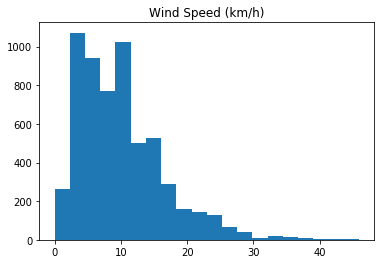

In [14]:
plt.title('Wind Speed (km/h)')
plt.hist(x = 'Wind Speed (km/h)', bins =20, data = df)
plt.show()

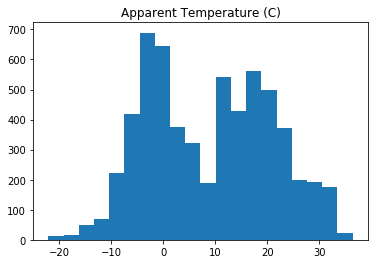

In [15]:

plt.title('Apparent Temperature (C)')
plt.hist(x = 'Apparent Temperature (C)', bins =20, data = df)
plt.show()

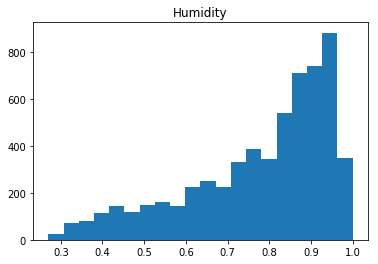

In [16]:
plt.title('Humidity')
plt.hist(x = 'Humidity',bins =20,data = df)
plt.show()

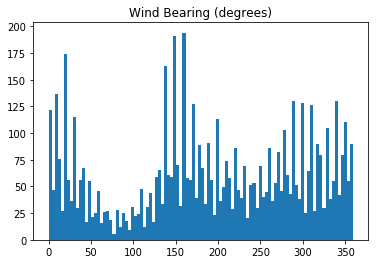

In [17]:
plt.title('Wind Bearing (degrees)')
plt.hist(x = 'Wind Bearing (degrees)',bins =100,data = df)
plt.show()


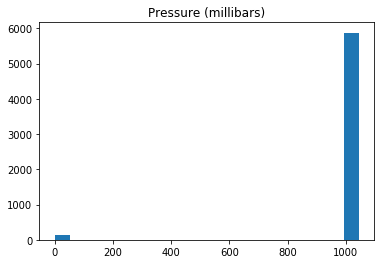

In [18]:
plt.title('Pressure (millibars)')
plt.hist(x = 'Pressure (millibars)',bins =20,data = df)
plt.show()

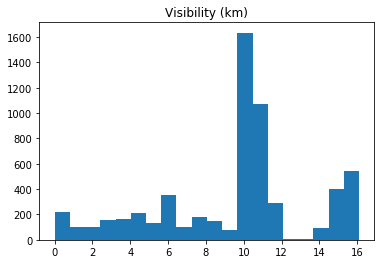

In [19]:
plt.title('Visibility (km)')
plt.hist(x = 'Visibility (km)',bins =20,data = df)
plt.show()

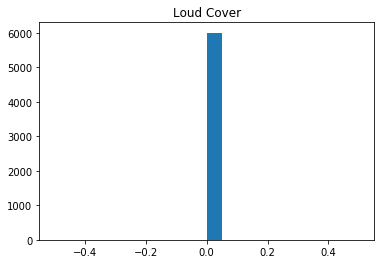

In [20]:
plt.title('Loud Cover')
plt.hist(x = 'Loud Cover',bins =20,data = df)
plt.show()

Loud Cover takes values Zero. So, we will remove it.

In [0]:
df=df.drop('Loud Cover',axis=1)

"Pressure (millibars)".

Some observations are nil. It seems that they lack values. because the pressure does not take zero as value.

Let's fill the zeros with the median:

In [0]:
pressure_median = df['Pressure (millibars)'].median()
      
def pressure(x):
    if x==0:
        return x + pressure_median
    else:
        return x
        
df["Pressure (millibars)"] = df.apply(lambda row:pressure(row["Pressure (millibars)"]) , axis = 1)




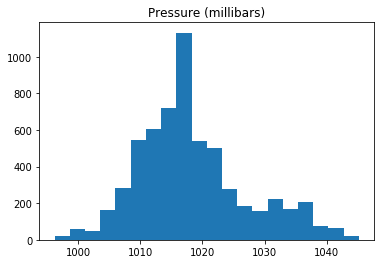

In [27]:
plt.title('Pressure (millibars)')
plt.hist(x = 'Pressure (millibars)',bins =20,data = df)
plt.show()

##Bivariate Analysis

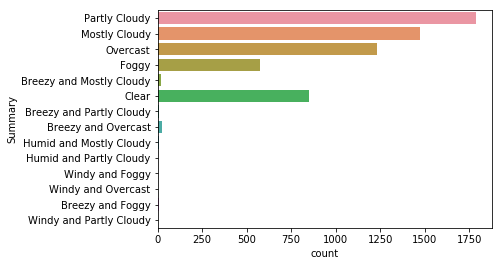

In [30]:
sns.countplot(y=df['Summary'])
plt.show()

In [31]:
df['Daily Summary'].value_counts(dropna=False)

Mostly cloudy throughout the day.                                                                                   600
Partly cloudy until night.                                                                                          456
Mostly cloudy until night.                                                                                          455
Partly cloudy throughout the day.                                                                                   384
Overcast throughout the day.                                                                                        360
Foggy starting overnight continuing until morning.                                                                  360
Partly cloudy starting in the morning.                                                                              336
Foggy in the morning.                                                                                               288
Foggy throughout the day.               

In [32]:
df['Summary'].value_counts(dropna=False)

Partly Cloudy               1791
Mostly Cloudy               1473
Overcast                    1230
Clear                        853
Foggy                        576
Breezy and Overcast           25
Breezy and Mostly Cloudy      20
Breezy and Partly Cloudy       7
Breezy and Foggy               7
Humid and Mostly Cloudy        6
Windy and Overcast             4
Humid and Partly Cloudy        3
Windy and Partly Cloudy        2
Windy and Foggy                2
Name: Summary, dtype: int64

In [33]:
df['Precip Type'].value_counts(dropna=False)

rain    4762
snow    1237
Name: Precip Type, dtype: int64

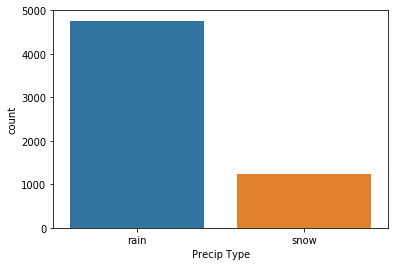

In [34]:
sns.countplot(x=df['Precip Type'])

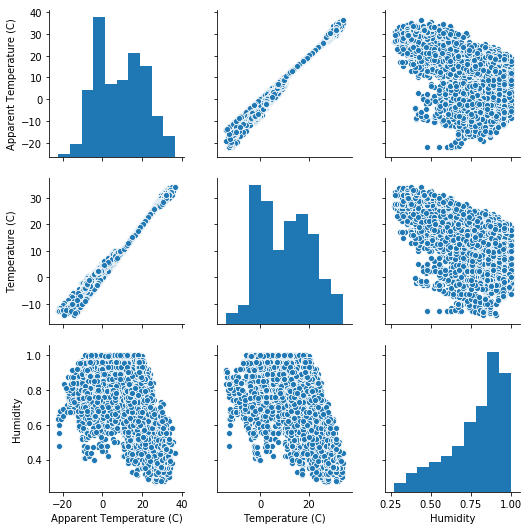

In [36]:
sns.pairplot(df[['Apparent Temperature (C)','Temperature (C)', 'Humidity' ]])
plt.show()

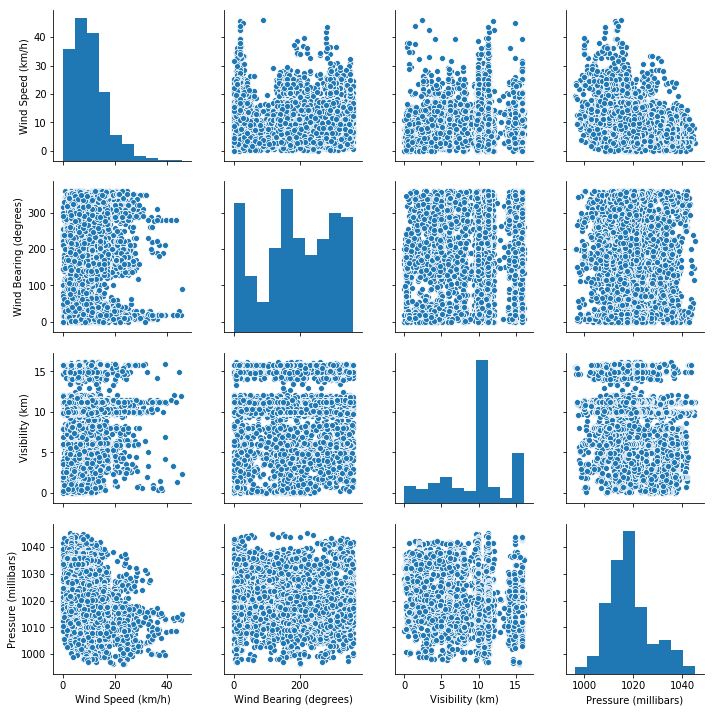

In [38]:
sns.pairplot(df[['Wind Speed (km/h)', 'Wind Bearing (degrees)', 'Visibility (km)', 'Pressure (millibars)']])
plt.show()


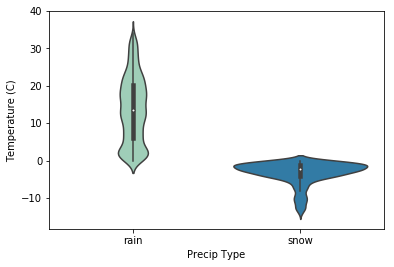

In [39]:
sns.violinplot(x="Precip Type", y="Temperature (C)", data=df, palette="YlGnBu");

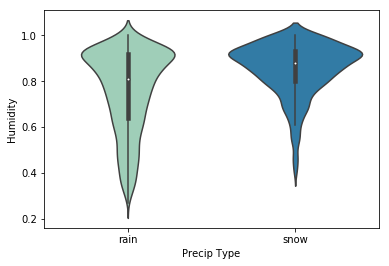

In [40]:
sns.violinplot(x="Precip Type", y="Humidity", data=df, palette="YlGnBu");

With these plots we can choose two variables to study the relationship betweem them.